<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%ED%95%A9%EB%B6%88%EC%9E%90%EB%A3%8C%EC%A0%95%EB%A6%AC_2024%ED%95%99%EB%85%84%EB%8F%84D%EA%B3%A0%EC%9E%85%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
import os
import openpyxl
import csv
from tabulate import tabulate
import matplotlib.pyplot as plt


##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}deungchon_2024_habul.xlsx')


# 첫 5줄을 봅니다.
df.tail(8)

,학번,이름,지역,대학,지원시기,전형명,계열,모집단위,1단계,최종,...,선택2_과목명,선택2_표준점수,선택2_백분위,선택2_등급,한국사_등급,제2외국어_과목명,제2외국어_등급,표점합_수능,백분위_수능,등급_수능
703,38037,김정호,경기,성균관대,나,수능(일반전형),자연,소프트웨어학과,합,합,...,물리학1,65.0,93.0,2.0,1.0,NaN,NaN,404.0,96.666667,2.333333
704,38037,김정호,서울,고려대,가,일반전형,자연,신소재공학부,합,합,...,물리학1,65.0,93.0,2.0,1.0,NaN,NaN,404.0,96.666667,2.333333
705,38040,이남윤,서울,고려대,가,일반전형,자연,환경생태공학부,합,합,...,지구과학1,61.0,84.0,3.0,1.0,NaN,NaN,398.0,94.166667,2.166667
706,30412,이서현,서울,성신여대,가,수능(일반학생),인문,인문융합예술계열,NaN,불,...,지구과학1,55.0,64.0,4.0,1.0,NaN,NaN,341.0,71.166667,4.333333
707,30412,이서현,서울,중앙대,나,수능(일반),인문,사회복지학부,NaN,불,...,지구과학1,55.0,64.0,4.0,1.0,NaN,NaN,341.0,71.166667,4.333333
708,30412,이서현,서울,강서대,다,수능(일반학생),자연,식품영양학과,NaN,불,...,지구과학1,55.0,64.0,4.0,1.0,NaN,NaN,341.0,71.166667,4.333333
709,30413,이유정,서울,연세대,가,수능(일반전형[일반계열]),인문,문헌정보학과,NaN,불,...,물리학1,58.0,73.0,4.0,2.0,NaN,NaN,392.0,92.166667,2.333333
710,30419,최윤혁,경기,단국대,다,일반학생,예체능,체육교육과,NaN,불,...,생활과윤리,58.0,72.0,4.0,2.0,NaN,NaN,361.0,81.000000,4.166667


In [2]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
frequency = df.groupby('지원시기').size().reset_index(name='빈도')

print(frequency)

     지원시기   빈도
0  수시_4년제  687
1      정시   24


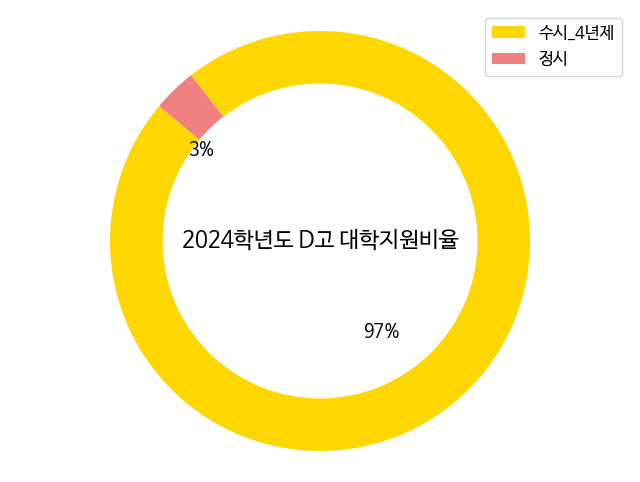

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 조건에 따라 '지원시기'열의 값 변경
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시',
                                       '수시1차': '수시', '수시2차': '수시', '수시': '수시'})


# 변경된 '지원시기'열의 값으로 groupby하여 빈도 계산
frequency = df.groupby('지원시기').size().reset_index(name='빈도')


# 각 항목별 비율 계산하여 '비율' 열에 저장
frequency['비율(%)'] = (frequency['빈도'] / frequency['빈도'].sum() * 100).astype(int)


# 데이터프레임에서 '지원시기'와 '빈도' 열 추출
labels = frequency['지원시기']
sizes = frequency['빈도']
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.02, 0, 0)  # 각 조각이 도넛에서 얼마나 떨어져 있는지 설정



# Ensure that explode has the same length as sizes
if len(explode) != len(sizes):
    explode = tuple(0 for _ in sizes)  # Set all explode values to 0 if lengths don't match


# 도넛 차트 생성
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.25))
plt.axis('equal')  # 동그랗게 만들기


# labels를 도넛 차트 위에 표시
plt.legend(wedges, labels, loc="best", fontsize=12)


# 비율(%)을 정수로 표시
for autotext in autotexts:
    autotext.set_text('{:.0f}%'.format(float(autotext.get_text().strip('%'))))



# 비율(%)의 글자 크기 확대 및 위치 조정
for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_position((autotext.get_position()[0] - 0.21, autotext.get_position()[1] ))
    autotext.set_horizontalalignment('left')


# '수시_4년제'에 해당하는 텍스트 위치 변경
for i, label in enumerate(labels):
    if label == '수시':
        autotexts[i].set_position((autotexts[i].get_position()[0], autotexts[i].get_position()[1] ))  # 수동으로 위치 조정

# 제목 추가
plt.text(0, 0, '2024학년도 D고 대학지원비율', fontsize=16, ha='center', va='center')

path = '/content/drive/MyDrive/python/deungchon/result_d/'
plt.savefig(f'{path}pass_2024_등촌고_수시정시지원비율.png')
plt.savefig(f'{path}pass_2024_등촌고_수시정시지원비율.pdf')

plt.show()

In [ ]:
df.columns

Index(['학번', '이름', '지역', '대학', '지원시기', '전형명', '계열', '모집단위', '1단계', '최종', '예비',
       '등록', '비고', '전형종류', '전형일자', '1단계발표일', '최종발표일', '최저학력기준', '모집인원', '전형분류',
       '전형방법', '전과목', '국수영사과', '국수영사', '국수영과', '국수영', '국어', '수학', '영어', '사회',
       '과학', '비교과', '국어_국어영역', '국어_표준점수', '국어_백분위', '국어_등급', '수학_수학영역',
       '수학_표준점수', '수학_백분위', '수학_등급', '영어_등급', '탐구영역', '선택1_과목명', '선택1_표준점수',
       '선택1_백분위', '선택1_등급', '선택2_과목명', '선택2_표준점수', '선택2_백분위', '선택2_등급',
       '한국사_등급', '제2외국어_과목명', '제2외국어_등급', '표점합_수능', '백분위_수능', '등급_수능'],
      dtype='object')

서울대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

연세대 합격자수 - 수시: 2명, 정시: 0명
-----------------------------------------

고려대 합격자수 - 수시: 3명, 정시: 2명
-----------------------------------------

서강대 합격자수 - 수시: 1명, 정시: 1명
-----------------------------------------

성균관대 합격자수 - 수시: 2명, 정시: 1명
-----------------------------------------

중앙대 합격자수 - 수시: 2명, 정시: 0명
-----------------------------------------

경희대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

이화여대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

동국대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

홍익대 합격자수 - 수시: 3명, 정시: 0명
-----------------------------------------

숙명여대 합격자수 - 수시: 1명, 정시: 1명
-----------------------------------------

국민대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

숭실대 합격자수 - 수시: 2명, 정시: 0명
-----------------------------------------

세종대 합격자수 - 수시: 3명, 정시: 1명
-----------------------------------------



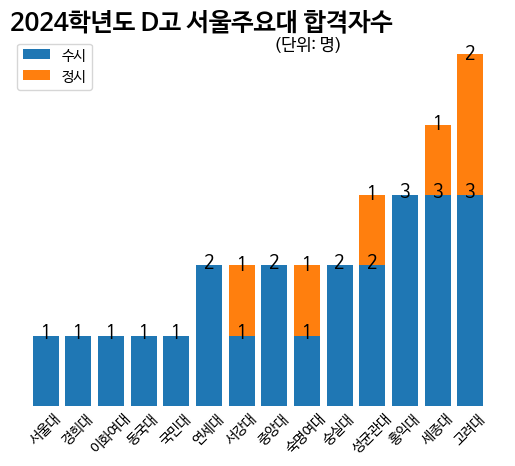

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대', '국민대', '숭실대', '세종대', '단국대']

# 데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}deungchon_2024_habul.xlsx')


# '지원시기'열의 값 변경: 가,나
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시',
                                       '수시1차': '수시', '수시2차': '수시'})

# 빈 리스트
uni_new = []
num_su = []
num_je = []

# 리스트에 새로운 대학리스트와, 수시합격자, 정시합격자를 담기
for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['지원시기', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['지원시기'] == '수시'])
    num_je_u = len(df_u[df_u['지원시기'] == '정시'])


    if num_su_u >= 1 or num_je_u >= 1:  # '지원시기'열의 값이 1 이상일 때만 값을 표시
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        print(u, "합격자수 - 수시:", str(num_su_u) + "명,", "정시:", str(num_je_u) + "명")
        print("-----------------------------------------\n")

# 지원시기가 1 이상인 데이터만 사용
num_su = [su for su, je in zip(num_su, num_je) if su >= 1 or je >= 1]
num_je = [je for su, je in zip(num_su, num_je) if su >= 1 or je >= 1]
uni_new = [uni for uni, su, je in zip(uni_new, num_su, num_je) if su >= 1 or je >= 1]

if len(uni_new) > 0:
    # sort the data by the total number of admissions (sum of num_su and num_je)
    data = sorted(zip(uni_new, num_su, num_je), key=lambda x: x[1]+x[2], reverse=False)
    uni_new = [x[0] for x in data]
    num_su = [x[1] for x in data]
    num_je = [x[2] for x in data]

    # plot the bar graph
    fig, ax = plt.subplots()
    ax.bar(uni_new, num_su, label='수시')
    ax.bar(uni_new, num_je, bottom=num_su, label='정시')

    # add value labels
    for i, (su, je) in enumerate(zip(num_su, num_je)):
        if su >= 1:
            ax.text(i, su+0.05, su, ha='center', va='center', fontsize=13)
        if je >= 1:
            ax.text(i, su + je+0.02, je, ha='center', va='center', fontsize=13)

    # 범례
    ax.legend()

    # 그래프 제목
    ax.set_title('2024학년도 D고 서울주요대 합격자수', fontsize=18, fontweight='bold', loc='left')

    # 그래프 부제목
    ax.text(0.6, 1.00, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)

    # X축 눈금(ticks) 제거
    ax.tick_params(axis='x', which='both', length=0)

    plt.xticks(rotation=45)  # x축 45도 회전
    plt.box(False)  # 테두리 박스 제거
    plt.yticks([])  # y축 제거

    path = '/content/drive/MyDrive/python/deungchon/result_d/'
    plt.savefig(f'{path}pass_2024_등촌고_합격자막대그래프.png')
    plt.savefig(f'{path}pass_2024_등촌고_합격자막대그래프.pdf')
    plt.show()
else:
    print("아쉽게도 그래프를 그릴 합격자가 없습니다.")

In [ ]:
df.columns

Index(['학번', '이름', '지역', '대학', '지원시기', '전형명', '계열', '모집단위', '1단계', '최종', '예비',
       '등록', '비고', '전형종류', '전형일자', '1단계발표일', '최종발표일', '최저학력기준', '모집인원', '전형분류',
       '전형방법', '전과목', '국수영사과', '국수영사', '국수영과', '국수영', '국어', '수학', '영어', '사회',
       '과학', '비교과', '국어_국어영역', '국어_표준점수', '국어_백분위', '국어_등급', '수학_수학영역',
       '수학_표준점수', '수학_백분위', '수학_등급', '영어_등급', '탐구영역', '선택1_과목명', '선택1_표준점수',
       '선택1_백분위', '선택1_등급', '선택2_과목명', '선택2_표준점수', '선택2_백분위', '선택2_등급',
       '한국사_등급', '제2외국어_과목명', '제2외국어_등급', '표점합_수능', '백분위_수능', '등급_수능'],
      dtype='object')

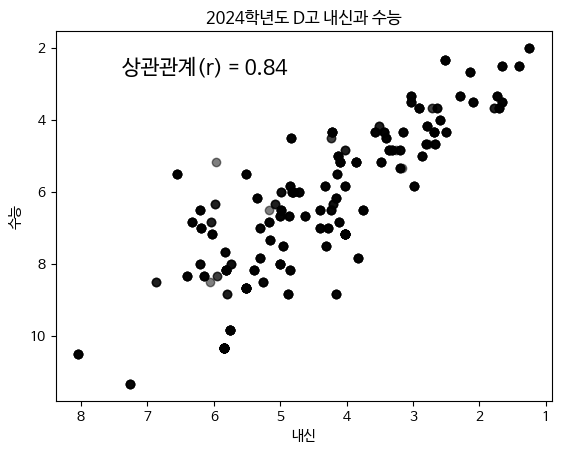

In [11]:
#내신과 수능과 상관관계A: 산포도


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# Drop rows with any NaN values in '전과목' or '등급_수능' columns
df = df.dropna(subset=['전과목', '등급_수능'])


# Extract '전과목' and '등급_수능' columns
x = df['전과목'].values
y = df['등급_수능'].values


# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]


# Create the scatter plot
plt.scatter(x, y, alpha=0.5,  c='black')
plt.title('2024학년도 D고 내신과 수능')
plt.xlabel('내신')
plt.ylabel('수능')

# Add the correlation coefficient to the plot
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.2f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)

# Reverse the x-axis and y-axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


#그래프 저장
path = '/content/drive/MyDrive/python/deungchon/result_d/'
plt.savefig(f'{path}pass_2024_등촌고_내신수능상관계수.png')
plt.savefig(f'{path}pass_2024_등촌고_내신수능상관계수.pdf')

plt.show()

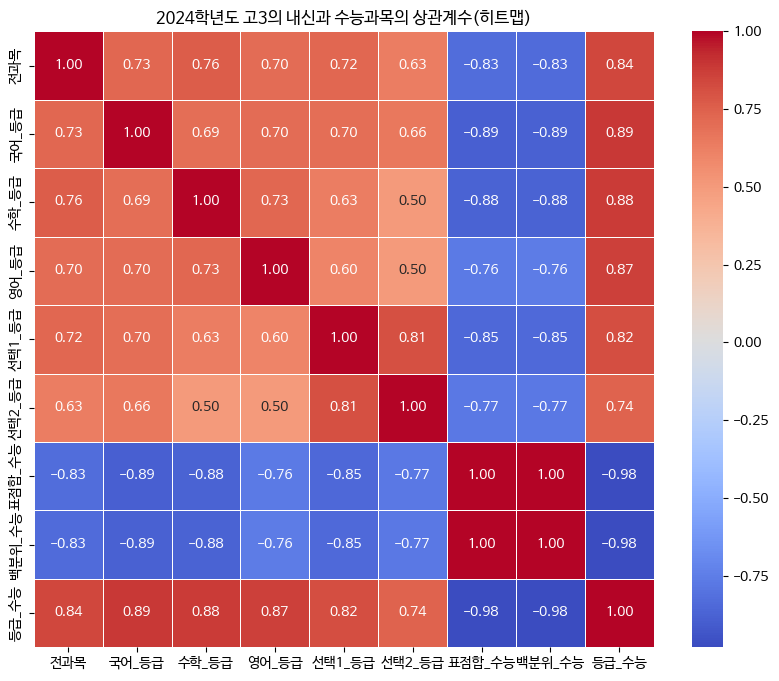

In [9]:
#내신과 수능과 상관관계B: 히트맵


import seaborn as sns

#일부 항목추출
df_heatmap = df[['전과목', '국어_등급', '수학_등급', '영어_등급', '선택1_등급', '선택2_등급', '표점합_수능',  '백분위_수능',  '등급_수능']]


# 상관계수 계산
corr = df_heatmap.corr()


# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('2024학년도 고3의 내신과 수능과목의 상관계수(히트맵)')

path = '/content/drive/MyDrive/python/deungchon/result_d/'
plt.savefig(f'{path}pass_2024_등촌고_히트맵상관계수.png')
plt.savefig(f'{path}pass_2024_등촌고_히트맵상관계수.pdf')

plt.show()

In [ ]:
#최종 결측값 기록
df['최종'].isna().sum()

29

In [ ]:
# 지원시기, 최종별 결측값 기록
df.isna().groupby(['지원시기', '최종']).sum()

학번  이름  지역  대학  전형명  계열  모집단위  1단계   예비   등록  ...  선택2_과목명  \
지원시기  최종                                                   ...            
False False   0   0   0   0    0   0     0  455  542  653  ...       54   
      True    0   0   0   0    0   0     0   24   20   29  ...        1   

             선택2_표준점수  선택2_백분위  선택2_등급  한국사_등급  제2외국어_과목명  제2외국어_등급  표점합_수능  \
지원시기  최종                                                                      
False False        54       54      54      39        664       664      69   
      True          1        1       1       0         29        29       3   

             백분위_수능  등급_수능  
지원시기  최종                    
False False      69     69  
      True        3      3  

[2 rows x 54 columns]

In [ ]:
# 지원시기와 최종의 빈도 및 비율 계산
지원시기_빈도 = df['지원시기'].value_counts()
최종_빈도 = df['최종'].value_counts()

# 빈도 출력
print("지원시기 빈도:")
print(지원시기_빈도)
print("\n최종 빈도:")
print(최종_빈도)

# 비율 계산 및 출력
print("\n지원시기 비율:")
print(지원시기_빈도 / 지원시기_빈도.sum())
print("\n최종 비율:")
print(최종_빈도 / 최종_빈도.sum())


지원시기 빈도:
수시    687
정시     24
Name: 지원시기, dtype: int64

최종 빈도:
불    510
합    172
Name: 최종, dtype: int64

지원시기 비율:
수시    0.966245
정시    0.033755
Name: 지원시기, dtype: float64

최종 비율:
불    0.747801
합    0.252199
Name: 최종, dtype: float64


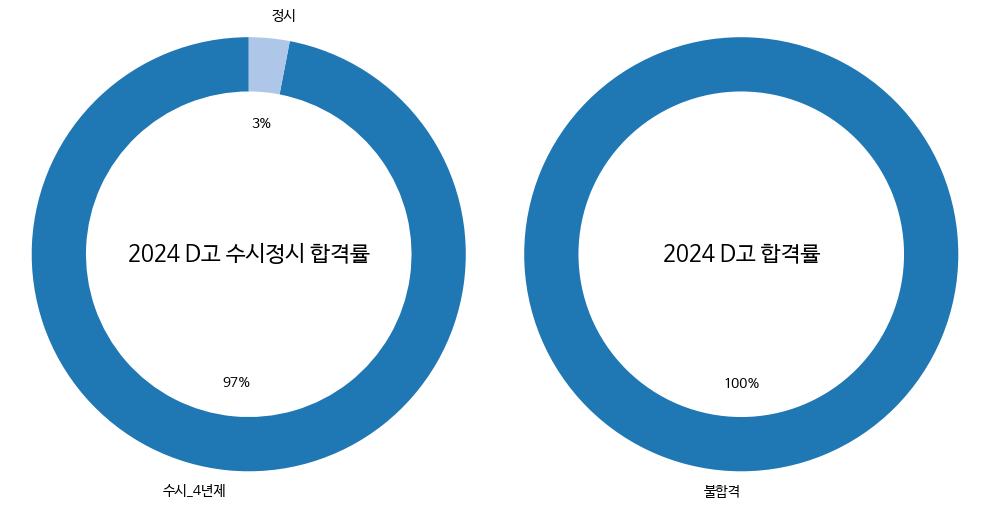

In [ ]:
#정시와 수시 지원률 그래프 그리기

import pandas as pd
import matplotlib.pyplot as plt



# '지원시기'별 비율 계산
지원시기_비율 = (df['지원시기'].value_counts(normalize=True) * 100).astype(int)  # 정수로 변환 후 퍼센트로 변환
labels = 지원시기_비율.index


# '최종' 열의 값이 '합'인 경우는 '합격', '불'인 경우는 '불합격'으로 변경
df['최종'] = df['최종'].apply(lambda x: '합격' if x == '합' else '불합격')


# '합격'과 '불합격'별 비율 계산
최종_비율 = (df['최종'].value_counts(normalize=True) * 100).astype(int)  # 정수로 변환 후 퍼센트로 변환


# '지원시기' 도넛 차트
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(지원시기_비율, labels=labels, autopct='%1.0f%%', startangle=90, colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.25))
# 제목 추가
plt.text(0, 0, '2024 D고 수시정시 합격률', fontsize=16, ha='center', va='center')
plt.axis('equal')  # 동그랗게 만들기


# '합격'과 '불합격' 도넛 차트
plt.subplot(1, 2, 2)
plt.pie(최종_비율, labels=최종_비율.index, autopct='%1.0f%%', startangle=90, colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.25))
plt.text(0, 0, '2024 D고 합격률', fontsize=16, ha='center', va='center')
plt.axis('equal')  # 동그랗게 만들기

plt.tight_layout()  # subplot 간 간격 조절


path = '/content/drive/MyDrive/python/deungchon/result_d/'
plt.savefig(f'{path}pass_2024_등촌고_수시정시합격률.png')
plt.savefig(f'{path}pass_2024_등촌고_수시정시합격률.pdf')
plt.show()


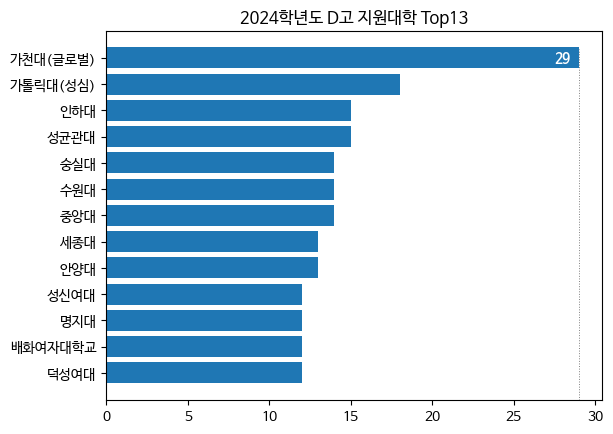

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}deungchon_2024_habul.xlsx')

# Filter the rows based on the frequency of the "대학" column
freq = df['대학'].value_counts()
freq = freq[freq >= 12]

# 대학수
freq_num = len(freq)

# Create a horizontal bar plot with descending order
freq_sorted = freq.sort_values()
plt.barh(freq_sorted.index, freq_sorted)



# Draw a dotted vertical line only from the X-axis tick with maximum value of the plot
max_value = max(freq_sorted)
plt.axvline(max_value, linestyle=':', color='gray', linewidth=0.7, ymax=0.95)  # 아래쪽 x축까지 선이 도달하도록 ymax 설정



# Annotate the maximum value on the plot
plt.text(max_value - 1.5, len(freq_sorted) - 1, f'{max_value}', color='white', fontsize=10, va='center', fontweight='bold')



# Save the plot in png and pdf formats
path1 = '/content/drive/MyDrive/python/deungchon/result_d/'

plt.title(f"2024학년도 D고 지원대학 Top{freq_num}")
plt.savefig(f'{path1}2024uni_preferred.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{path1}2024uni_preferred.pdf', bbox_inches='tight')
plt.show()


In [ ]:
# 반별 : 전문대 제외한 4년제 합격자 총명단

from tabulate import tabulate

path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}deungchon_2024_habul.xlsx')


#지역, 최종, ace대학 제외
seoul_df = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]


#필요한 변수(열)만 불러옴
seoul_df = seoul_df[['지역', '학번', '계열', '이름', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류']]



# tabulate를 사용하여 결과 출력
print(tabulate(seoul_df, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")



#합격자수
print("2024학년도  D고 대학 합격자수는 %d건입니다.(중복합격 포함)" % len(seoul_df))


#데이터 프레임으로 전환
seoul_df_p = pd.DataFrame(seoul_df)


#결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/deungchon/result_d/'
seoul_df_p.to_excel(excel_writer= f'{path}반별합격자명단_2024_등촌고.xlsx')

지역      학번  계열    이름    대학              모집단위                                      최종      전과목  지원시기    전형분류
서울     30102  자연    김예원  고려대            간호대학                                      합         1.667  수시        교과
충남     30103  자연    김온유  한국기술교대      에너지신소재화학공학부(에너지신소재공학전공)  합         4.333  수시        교과
강원     30103  공통    김온유  한림대            미래융합스쿨                                  합         4.333  수시        교과
인천     30104  자연    김은재  인하대            공간정보공학과                                합         2.595  수시        교과
충남     30105  자연    김현준  한서대(태안)      항공운항학과                                  합         3.153  수시        종합
서울     30112  자연    유채원  성공회대          미래융합학부                                  합         4.847  수시        종합
서울     30117  자연    황수빈  덕성여대          가상현실융합학과                              합         3.432  수시        교과
경기     30118  자연    황정빈  을지대(성남)      바이오공학부                                  합         4.396  수시        종합
경기     30119  자연    황준우  한국공학대       

In [ ]:
import pandas as pd
from tabulate import tabulate

# 4년제대 합격자 명단A - 선호대학 순으로 출력

# 지역, 최종, ace대학 제외
uni4 = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]

# 필요한 변수(열)만 불러옴
uni4 = uni4[['지역', '이름', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류', '표점합_수능', '백분위_수능']]


uni4['전과목'] = uni4['전과목'].round(2)

# NaN 값을 '졸업생'으로 변경
uni4['전과목'].fillna('졸업생', inplace=True)



# 결과를 출력할 순서대로 정렬
output_order = ['강릉원주대(강릉)', '서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)', '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']

uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))

# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")

# 합격자수
print("2024학년도 등촌고 대학 합격자수는 %d건입니다.(중복합격 포함)" % len(uni4))

# 데이터 프레임으로 전환
uni4_p = pd.DataFrame(uni4)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/deungchon/result_d/'
uni4_p.to_excel(excel_writer=f'{path}선호대학순_2024_등촌고_uniorder.xlsx')


지역    이름    대학              모집단위                                      최종    전과목    지원시기    전형분류      표점합_수능    백분위_수능
강원    문기윤  강릉원주대(강릉)  치의예과                                      합      1.4       수시        종합                  381        90
서울    김윤하  서울대            인문계열                                      합      1.25      수시        종합                  399        95.1667
서울    김윤하  연세대            융합인문사회과학부                            합      1.25      수시        종합                  399        95.1667
서울    김윤하  연세대            심리학과                                      합      1.25      수시        교과                  399        95.1667
서울    김예원  고려대            간호대학                                      합      1.67      수시        교과                  400        95
서울    김윤하  고려대            미디어학부                                    합      1.25      수시        교과                  399        95.1667
서울    서현진  고려대            보건환경융합과학부                            합      1.66      수시        교과      

In [ ]:
df.columns

Index(['학번', '이름', '지역', '대학', '지원시기', '전형명', '계열', '모집단위', '1단계', '최종', '예비',
       '등록', '비고', '전형종류', '전형일자', '1단계발표일', '최종발표일', '최저학력기준', '모집인원', '전형분류',
       '전형방법', '전과목', '국수영사과', '국수영사', '국수영과', '국수영', '국어', '수학', '영어', '사회',
       '과학', '비교과', '국어_국어영역', '국어_표준점수', '국어_백분위', '국어_등급', '수학_수학영역',
       '수학_표준점수', '수학_백분위', '수학_등급', '영어_등급', '탐구영역', '선택1_과목명', '선택1_표준점수',
       '선택1_백분위', '선택1_등급', '선택2_과목명', '선택2_표준점수', '선택2_백분위', '선택2_등급',
       '한국사_등급', '제2외국어_과목명', '제2외국어_등급', '표점합_수능', '백분위_수능', '등급_수능'],
      dtype='object')

In [ ]:
# 4년제대 합격자 명단B - 선호대학 순: 익명처리

from tabulate import tabulate


# 지역, 최종, ace대학 제외
uni4 = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]


# 필요한 변수(열)만 불러옴
uni4 = uni4[['이름', '지역', '대학', '모집단위', '최종', '전과목']]


uni4['전과목'] = uni4['전과목'].round(2)


# Show first two letters and replace the third letter with an asterisk in '이름' column
uni4.loc[ :, '이름'] = uni4.loc[ :, '이름'].apply(lambda x: x[:1] + '**' + x[3:] if len(x) >= 3 else x[:2])


# 결과를 출력할 순서대로 정렬
output_order = [ '강릉원주대(강릉)', '서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)', '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']


uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))


# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")

# 합격자수
print("2024학년도 등촌고 대학 합격자수는 %d건입니다.(중복포함)" % len(uni4))

# 데이터 프레임으로 전환
uni4_p = pd.DataFrame(uni4)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/deungchon/result_d/'
uni4_p.to_excel(excel_writer=f'{path}합격자익명_2024_등촌고_uniorder_anonymous.xlsx')

이름    지역    대학              모집단위                                      최종      전과목
문**    강원    강릉원주대(강릉)  치의예과                                      합          1.4
김**    서울    서울대            인문계열                                      합          1.25
김**    서울    연세대            융합인문사회과학부                            합          1.25
김**    서울    연세대            심리학과                                      합          1.25
김**    서울    고려대            간호대학                                      합          1.67
김**    서울    고려대            미디어학부                                    합          1.25
서**    서울    고려대            보건환경융합과학부                            합          1.66
김**    서울    고려대            신소재공학부                                  합        nan
이**    서울    고려대            환경생태공학부                                합        nan
김**    서울    서강대            인문학부                                      합          1.25
이**    서울    서강대            물리학과                                      합          2.51

In [ ]:
# 게시용 4년제대 합격자 명단B: '지역', '대학', '모집단위', '지원시기'


import pandas as pd
from tabulate import tabulate

# 최종 열의 값이 '가나다'일 때 '정시'로 변경
df.loc[df['최종'] == '가나다', '최종'] = '정시'

# 게시용 4년제대 합격자 명단A: '지역', '대학', '모집단위', '지원시기'

# uni4 DataFrame 생성
uni4 = df[(df['최종'] == '합') & ~(df['대학'].str.contains("대학교"))][['지역', '대학', '모집단위', '지원시기']]


# '지원시기' 열의 값이 '가', '나', '다'일 경우 '정시'로 변경
uni4.loc[uni4['지원시기'].isin(['가', '나', '다']), '지원시기'] = '정시'


# 결과를 출력할 순서대로 정렬
output_order = ['강릉원주대(강릉)', '서울대',  '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)',
                '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']

uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))

# 합격자수
print("2024 D고 4년제대 합격자수는 %d건입니다.(중복합격 포함)" % len(uni4))
print("***************************************************************************")

# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))

# 데이터프레임을 엑셀로 저장
path = '/content/drive/MyDrive/python/deungchon/result_d/'
uni4.to_excel(excel_writer=f'{path}게시용합격자_2024_등촌고_uniorder_board1.xlsx', index=False)


2024 D고 4년제대 합격자수는 121건입니다.(중복합격 포함)
***************************************************************************
지역    대학              모집단위                                      지원시기
강원    강릉원주대(강릉)  치의예과                                      수시
서울    서울대            인문계열                                      수시
서울    연세대            융합인문사회과학부                            수시
서울    연세대            심리학과                                      수시
서울    고려대            간호대학                                      수시
서울    고려대            미디어학부                                    수시
서울    고려대            보건환경융합과학부                            수시
서울    고려대            신소재공학부                                  정시
서울    고려대            환경생태공학부                                정시
서울    서강대            인문학부                                      수시
서울    서강대            물리학과                                      정시
서울    성균관대          글로벌경제학과                                수시
서울    성균관대          인문과학계열                        

In [ ]:
# 게시용 4년제대 합격자 명단B: '지역', '대학', '모집단위', '지원시기', '전형분류'

from tabulate import tabulate


# 지역, 최종, ace대학 제외
uni4 = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]



# '지원시기' 열의 값이 '가', '나', '다'일 경우 '정시'로 변경
uni4.loc[uni4['지원시기'].isin(['가', '나', '다']), '지원시기'] = '정시'


# 필요한 변수(열)만 불러옴
uni4 = uni4[['지역', '대학', '모집단위', '지원시기', '전형분류']]



# 결과를 출력할 순서대로 정렬
output_order = ['강릉원주대(강릉)', '서울대',  '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)',
                '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']


uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))



# 합격자수
print("2024 D고 4년제대 합격자수는 %d건입니다.(중복합격 포함)" % len(uni4))
print("**********************************************************************")


# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))


# 데이터 프레임으로 전환
uni4_p = pd.DataFrame(uni4)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/deungchon/result_d/'
uni4_p.to_excel(excel_writer=f'{path}pass_2024_등촌고_uniorder_board2.xlsx')

2024 D고 4년제대 합격자수는 121건입니다.(중복합격 포함)
**********************************************************************
지역    대학              모집단위                                      지원시기    전형분류
강원    강릉원주대(강릉)  치의예과                                      수시        종합
서울    서울대            인문계열                                      수시        종합
서울    연세대            융합인문사회과학부                            수시        종합
서울    연세대            심리학과                                      수시        교과
서울    고려대            간호대학                                      수시        교과
서울    고려대            미디어학부                                    수시        교과
서울    고려대            보건환경융합과학부                            수시        교과
서울    고려대            신소재공학부                                  정시        수능
서울    고려대            환경생태공학부                                정시        수능
서울    서강대            인문학부                                      수시        교과
서울    서강대            물리학과                                      정시        수능

In [ ]:
#이름으로 백분위 점수 조회
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['학번', '이름', '대학',  '모집단위', '최종', '전형분류', '전과목', '표점합_수능', '백분위_수능', '전형명', '전형분류', '전형명', '전형방법']]

df_name['전과목'] = df_name['전과목'].round(1)
df_name

이름:장진서


,학번,이름,대학,모집단위,최종,전형분류,전과목,표점합_수능,백분위_수능,전형명,전형분류,전형명,전형방법
575,30615,장진서,고려대,간호대학,불,교과,1.7,369.0,83.666667,학교추천,교과,학교추천,학생부 80% + 서류 20%
576,30615,장진서,성균관대,약학과,불,종합,1.7,369.0,83.666667,학과모집,종합,학과모집,서류 100%
577,30615,장진서,아주대,약학과,불,종합,1.7,369.0,83.666667,ACE,종합,ACE,1단계:【3배수】서류 100%_x000D_\n2단계:면접 30% + 1단계성적 70%
578,30615,장진서,서강대,화학과,불,교과,1.7,369.0,83.666667,지역균형,교과,지역균형,학생부 100%
579,30615,장진서,연세대,도시공학과,불,교과,1.7,369.0,83.666667,추천형,교과,추천형,1단계:【5배수】학생부 100%_x000D_\n2단계:면접 30% + 1단계성적 70%
580,30615,장진서,성균관대,전자전기공학부,불,교과,1.7,369.0,83.666667,학교장추천,교과,학교장추천,학생부 100%
692,30615,장진서,광운대,소프트웨어학부,합,수능,1.8,369.0,83.666667,일반학생전형,수능,일반학생전형,수능 100%
693,30615,장진서,세종대,자연생명계열,합,수능,1.8,369.0,83.666667,수능(일반학생전형),수능,수능(일반학생전형),수능 100%
694,30615,장진서,숭실대,전자정보공학부(전자공학전공),불,수능위주,1.8,369.0,83.666667,수능(일반전형),수능위주,수능(일반전형),수능 100%


In [ ]:
df.columns

Index(['학번', '이름', '지역', '대학', '지원시기', '전형명', '계열', '모집단위', '1단계', '최종', '예비',
       '등록', '비고', '전형종류', '전형일자', '1단계발표일', '최종발표일', '최저학력기준', '모집인원', '전형분류',
       '전형방법', '전과목', '국수영사과', '국수영사', '국수영과', '국수영', '국어', '수학', '영어', '사회',
       '과학', '비교과', '국어_국어영역', '국어_표준점수', '국어_백분위', '국어_등급', '수학_수학영역',
       '수학_표준점수', '수학_백분위', '수학_등급', '영어_등급', '탐구영역', '선택1_과목명', '선택1_표준점수',
       '선택1_백분위', '선택1_등급', '선택2_과목명', '선택2_표준점수', '선택2_백분위', '선택2_등급',
       '한국사_등급', '제2외국어_과목명', '제2외국어_등급', '표점합_수능', '백분위_수능', '등급_수능'],
      dtype='object')

In [ ]:
#지원자수가 궁금한 대학 파악: 1.이름 2.엑셀결과를 00대로 자동저장  3.결과 오름차순 정렬

from tabulate import tabulate
import pandas as pd

uni = input("지원횟수가 궁금한 대학:")

# Find strings containing the input 'uni' in '대학' column
df_대학 = df['대학'].str.contains(uni, regex=False)

# 지방캠퍼스 대학 제외 ex)동국대(경주)
df_대학 = df_대학 & ~df['대학'].str.contains('[()]+', regex=True)

subset_df = df[df_대학]
subset_df_p = subset_df[(subset_df['최종'] == '합') | (subset_df['최종'] == '불')]
subset_df_p = subset_df_p[[ '학번', '이름', '대학', '모집단위', '전형분류', '최종', '전과목', ]]

# Sort the DataFrame by '전과목' column in ascending order
subset_df_p = subset_df_p.sort_values(by='전과목', ascending=True)

subset_df_p_applicants = len(subset_df_p)

# Convert DataFrame to a list of lists for tabulate
table_data = subset_df_p.values.tolist()

# Define the table headers
table_headers = [ '학번', '이름', '대학', '모집단위', '전형분류', '최종', '전과목', ]

# Format the columns '전과목' and  with two decimal places
table_data_formatted = []
for row in table_data:
    formatted_row = row[:7]  # Copy the first 7 columns as-is
    formatted_row.append(f"{row[7]:.2f}")  # Format '전과목' with two decimal places
    formatted_row.append(f"{row[8]:.1f}")  # Format  with two decimal places
    table_data_formatted.append(formatted_row)

# Create the formatted table using tabulate
table_string = tabulate(table_data_formatted, headers=table_headers, tablefmt='plain')

print(table_string)
print(f"\n{uni}대 지원횟수는 총 {subset_df_p_applicants}건입니다.")

# Save the sorted DataFrame to an Excel file with a dynamic file name
excel_filename = f"/content/drive/MyDrive/python/habbul/result_d/{uni}대_fullname.xlsx"
subset_df_p.to_excel(excel_filename, index=False)
print(f"결과가 '{excel_filename}'에 저장되었습니다.")\


In [ ]:
#지원자수가 궁금한 대학 파악: 결과를 익명으로 보여줌 - 1.성+이름(*) 2.엑셀결과를 00대로 자동저장  3.결과 오름차순 정렬

from tabulate import tabulate
import pandas as pd

uni = input("지원횟수가 궁금한 대학:")

# Find strings containing the input 'uni' in '대학' column
df_대학 = df['대학'].str.contains(uni, regex=False)


# 지방캠퍼스 대학 제외 ex)동국대(경주)
df_대학 = df_대학 & ~df['대학'].str.contains('[()]+', regex=True)


subset_df = df[df_대학]
subset_df_p = subset_df[(subset_df['최종'] == '합') | (subset_df['최종'] == '불')]


# 이름 일부 익명처리 - 이름의 세 글자중 세번째 글자를 별표 표시, 네번째 글자부터는 그대로 표시
subset_df_p['이름'] = subset_df_p['이름'].apply(lambda x: x[:2] + '*' + x[3:] if len(x) >= 3 else x[:2])

subset_df_p = subset_df_p[[ '학번', '이름', '대학', '모집단위', '전형분류', '최종', '전과목', ]]

# Sort the DataFrame by '전과목' column in ascending order
subset_df_p = subset_df_p.sort_values(by='전과목', ascending=True)

subset_df_p_applicants = len(subset_df_p)

# Convert DataFrame to a list of lists for tabulate
table_data = subset_df_p.values.tolist()

# Define the table headers
table_headers = [ '학번', '이름', '대학', '모집단위', '전형분류', '최종', '전과목', ]

# Format the columns '전과목' and  with two decimal places
table_data_formatted = []
for row in table_data:
    formatted_row = row[:7]  # Copy the first 7 columns as-is
    formatted_row.append(f"{row[7]:.2f}")  # Format '전과목' with two decimal places
    formatted_row.append(f"{row[8]:.1f}")  # Format  with two decimal places
    table_data_formatted.append(formatted_row)

# Create the formatted table using tabulate
table_string = tabulate(table_data_formatted, headers=table_headers, tablefmt='plain')

print(table_string)
print(f"\n{uni}대 지원횟수는 총 {subset_df_p_applicants}건입니다.")

# Save the sorted DataFrame to an Excel file with a dynamic file name
excel_filename = f"/content/drive/MyDrive/python/habbul/result_d/{uni}_익명.xlsx"
subset_df_p.to_excel(excel_filename, index=False)
print(f"결과가 '{excel_filename}'에 저장되었습니다.")

In [ ]:
#특정 백분위 구간의 점수별 빈도(ex: 80~85%사이의 빈도수)
mi = int(input("이상:"))
mx = int(input("미만:"))


# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.백분위_평균 >= mi) & (df.백분위_평균 < mx)]

#중복학생을 제외하고 1개만 남김
df_interval = df_interval.drop_duplicates('이름')

df_interval_name = df_interval[['학번', '이름', '백분위_평균', '전과목']].copy()


#전과목 열을 소숫점 둘째자리까지만 표시
df_interval_name['백분위_평균'] = df_interval_name['백분위_평균'].round(1)


#전과목 열을 소숫점 둘째자리까지만 표시
df_interval_name['전과목'] = df_interval_name['전과목'].round(2)


#결과를 백분위_평균순으로 내림차순
df_interval_name = df_interval_name.sort_values(by='백분위_평균', ascending=False)


# Define the table headers
table_headers = ['학번', '이름', '백분위_평균', '전과목']


# Create the formatted table using tabulate
table_string = tabulate(df_interval_name, headers=table_headers, tablefmt='plain')
print(table_string)
print()


print("--------------------------------------------")
#print(str(len(list_1))+"명")

print(f"백분위 {mi}%이상 {mx}% 미만 :{len(df_interval)}명")
#자료 https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts8

In [ ]:
# 수능 2등급 나온 학생들의 내신과 수능백분위의 상관
import pandas as pd

import numpy as np
from scipy.stats import pearsonr


##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_csv(f'{path}susi_jsi.csv', encoding = 'cp949')


#특정 백분위 구간의 점수별 빈도(ex: 80~85%사이의 빈도수)
mi = int(input("이상:"))
mx = int(input("미만:"))


# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.백분위_평균 >= mi) & (df.백분위_평균 < mx)]

#중복학생을 제외하고 1개만 남김
#df_interval = df_interval.drop_duplicates('이름')

df_interval_name = df_interval[['학번', '이름', '백분위_평균', '전과목']].copy()


# 상관계수 및 p-값 계산
corr, p_value = pearsonr(df_interval_name['전과목'], df_interval_name['백분위_평균'])
r_squared = corr ** 2

# 결과 출력
print(f"상관계수: {corr:.2f}")
print(f"p-값: {p_value:.2f}")
print(f"설명력: {r_squared:.2f}")

In [ ]:
df.info()

In [ ]:
#전체 합격자: 중복 합격포함 : 134건
df_pass = df[df.최종 == '합']
print(df_pass.count())

#수시, 정시별 합격건수: 수시(123건), 정시(11건)
df_pass.groupby(['지원시기']).count()

In [ ]:
#중복합격자 제외
df_pass['학번'].unique()

#중복합격자수 제외한 합격자수: 71명
df_pass['학번'].nunique()

In [ ]:
#이름으로 백분위 점수 조회
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['학번', '이름', '대학',  '모집단위', '최종', '전형분류', '전과목', '표점합_수능', '백분위_수능', '전형명', '전형분류', '전형명', '전형방법']]

df_name['전과목'] = df_name['전과목'].round(1)
df_name

이름:최형윤


,학번,이름,대학,모집단위,최종,전형분류,전과목,표점합_수능,백분위_수능,전형명,전형분류,전형명,전형방법
684,38048,최형윤,경인교대,초등교육과,합,교과,NaN,360.0,80.333333,학교장추천,교과,학교장추천,1단계:【2.5배수】학생부 100%_x000D_\n2단계:면접 30% + 1단계성적...
685,38048,최형윤,춘천교대,초등교육학과,합,종합,NaN,360.0,80.333333,교직적인성인재,종합,교직적인성인재,서류 100%
686,38048,최형윤,진주교대,초등교육과,합,종합,NaN,360.0,80.333333,21세기형 교직 적성자,종합,21세기형 교직 적성자,서류 100%


In [ ]:
#이름으로 백분위 점수 조회
school = input("대학:")
df_name = df[(df.대학 == school)]
df_name = df_name[['학번', '이름', '대학',  '모집단위', '최종', '전형분류', '전과목', '표점합_수능', '백분위_수능', '전형명', '전형분류', '전형명', '전형방법']]

df_name['전과목'] = df_name['전과목'].round(1)
df_name

대학:진주교대


,학번,이름,대학,모집단위,최종,전형분류,전과목,표점합_수능,백분위_수능,전형명,전형분류,전형명,전형방법
686,38048,최형윤,진주교대,초등교육과,합,종합,NaN,360.0,80.333333,21세기형 교직 적성자,종합,21세기형 교직 적성자,서류 100%


In [ ]:
df.columns

Index(['학번', '이름', '지역', '대학', '지원시기', '전형명', '계열', '모집단위', '1단계', '최종', '예비',
       '등록', '비고', '전형종류', '전형일자', '1단계발표일', '최종발표일', '최저학력기준', '모집인원', '전형분류',
       '전형방법', '전과목', '국수영사과', '국수영사', '국수영과', '국수영', '국어', '수학', '영어', '사회',
       '과학', '비교과', '국어_국어영역', '국어_표준점수', '국어_백분위', '국어_등급', '수학_수학영역',
       '수학_표준점수', '수학_백분위', '수학_등급', '영어_등급', '탐구영역', '선택1_과목명', '선택1_표준점수',
       '선택1_백분위', '선택1_등급', '선택2_과목명', '선택2_표준점수', '선택2_백분위', '선택2_등급',
       '한국사_등급', '제2외국어_과목명', '제2외국어_등급', '표점합_수능', '백분위_수능', '등급_수능'],
      dtype='object')

In [ ]:
#반 입력해서 해당반 학생들 출력하기 ex)302
num = input("학년반 ex)301: ")
df_num = df[df['학번'].astype(str).str.contains(num)]
df_num = df_num[['학번', '이름', '대학', '모집단위', '전과목', , '백분위_평균']]
df_num

In [ ]:
name = input("이름:")
df_ascend = df.sort_values('전형', ascending=True)
df_ascend = df_ascend[(df_ascend.이름 == name)]
print(df_ascend)

# 이름을 입력하여 내신기준 석차를 출력하는 코드 설명

1)* df[df['전과목'] < df_filtered['전과목'].iloc[0]]* selects rows from the DataFrame where the "전과목" value is lower than the "전과목" value of the student whose name was input by the user. This creates a filtered DataFrame that includes all students who have a lower "전과목" value than the input student.


2) *.groupby('이름')['전과목']* groups the filtered DataFrame by the "이름" column and selects the "전과목" column. This creates a Series object that contains the "전과목" values of all the students who have a higher "전과목" value than the input student, grouped by name.


3) *.nunique()* counts the number of unique "전과목" values in the grouped Series. This effectively counts the number of students who have a higher "전과목" value than the input student, excluding any duplicates.

4) *.sum()* adds up the counts of unique "전과목" values for all the groups. This gives the total number of students who have a higher "전과목" value than the input student, excluding duplicates.

5)* + 1* adds 1 to the total count to get the rank of the input student, since the rank is equal to the number of students with a higher "전과목" value plus 1.

6) Finally, the rank is assigned to the rank variable and returned as the output of the program.

In [ ]:
# 이름으로 학생의 내신과 석차를 확인

# Get input name
name = input("이름:")

# Filter DataFrame to only include rows with the input name
df_filtered = df[df['이름'] == name]

# 학생의 내신
df_filtered_nesin = df_filtered['전과목'].iloc[0].round(1)


# Calculate rank
# 해당 학생보다 내신 성적이 낮은 학생들의 수
lower_scores = df[df['전과목'] < df_filtered_nesin]['이름'].nunique()

# 동일한 내신 성적을 가진 학생들의 수
equal_scores = df[df['전과목'] == df_filtered_nesin]['이름'].nunique() - 1

# 최종 석차 계산
rank = lower_scores + equal_scores + 1

# Print the result
print("********************************************")
print(f"{name}의 내신은 {df_filtered_nesin}등급이고 석차는 {rank}등입니다.")


이름:김지현
********************************************
김지현의 내신은 2.6등급이고 석차는 16등입니다.


In [ ]:
#이름으로 해당 학생의 전체 석차를 확인: 아름다운 코드 B - 단순한 코드

# Get input name
name = input("이름:")

# Filter DataFrame to only include rows with the input name
df_filtered = df[df['이름'] == name]

# Calculate rank of first row in filtered DataFrame
rank = df[df.전과목 < df_filtered.전과목.iloc[0]]
rank = rank.groupby('이름')['전과목'].nunique().sum() + 1

# Print the result
print(f"{name}의 '전과목' 등수는 {rank}등 입니다.")


In [ ]:
#내신등급을 단순 오름차순
rank_list = sorted(list(df['전과목']), reverse=False)
print(rank_list)

In [ ]:
#대학으로 과목별 등급과 등급_평균 조회
name = input("대학:")
df_name = df[(df.대학 == name) & (df.최종 == '합')]
df_name = df_name[['학번', '이름', '대학',  '모집단위', '최종', '전형명', '전형분류','전과목', '백분위_평균', '표점합', '전형방법', '전형종류', '모집인원']]
df_name

In [ ]:
#학번으로 백분위 점수 조회
code = int(input("학번:"))
df_code = df[(df.학번 == code)]
df_code = df_code[['학번', '이름', '대학',  '모집단위', '최종', ]]
df_code

In [ ]:
#대학유형 지원율: 수시93%, 정시7% / 4년제 80% vs. 전문대 20%
#지원시기, 대학유형별 지원빈도
df_unitype = df.groupby([ '대학유형']).count()
df_unitype

In [ ]:
mi = int(input("영어 수능등급:"))
df_interval = df[(df.등급_영어 == mi)]
df_interval[['학번', '등급_영어']]
df_interval_unique = df_interval['학번'].unique().size
print("영어 수능등급 {}명".format(df_interval_unique))

In [ ]:
# D고 작년 고3 수능 백분위평균: 백분위 44%!
df_percentile = df.dropna(subset = ['백분위_평균'])
p_mean = df_percentile['백분위_평균'].mean()
print(p_mean)

43.79119658119659


In [ ]:
# D고 작년 고3 수능 표점 평균:
df_standard = df.dropna(subset = ['표점합'])
s_mean = df_standard['표점합'].mean().round(0)
print(int(s_mean))  # 소수점 첫째 자리에서 반올림

280


In [ ]:
name = input("이름의 일부:")
df_pname = df['이름'].str.contains(name)
df_pname_sub = df[df_pname]
df_pname_sub[['학번', '이름', '대학', '모집단위',  '최종', '전과목', '백분위_평균', '표점합', '모집인원', '전형분류', '전형종류']]

In [ ]:
#D고 내신 4등급 이하 학생 중 수능이 내신보다 더 잘 나온 학생 비율
# Filter the DataFrame
filtered_df = df[ (df['전과목'] <= 4) & (df['전과목'] > df[])]
filtered_df = filtered_df.drop_duplicates(subset='이름')

# Print the filtered DataFrame
print(filtered_df[['이름', '전과목', ]])

In [ ]:
#D고 내신 X등급 이하 학생 중 수능이 내신보다 더 잘 나온 학생 비율

nesin = int(input("내신이 X등급 이하 학생 중 수능이 내신보다 잘 나오는 학생 출력, 기준이 되는 등급을 입력: "))

# Filter the DataFrame
filtered_df = df[ (df['전과목'] <= nesin) & (df['전과목'] > df[])]
filtered_df = filtered_df.drop_duplicates(subset='이름')

#전과목을 소수점 둘째자리에 반올림
filtered_df['전과목'] = filtered_df['전과목'].round(1)


# Print the filtered DataFrame
print(filtered_df[['이름', '전과목', ]])

In [ ]:
#수능이 내신보다 더 잘 나오는 학생

# Filter the DataFrame
filtered_df = df[df['전과목'] > df[]]
filtered_df = filtered_df.drop_duplicates(subset='이름')


# Round the '전과목' column to two decimal places
filtered_df['전과목'] = filtered_df['전과목'].apply(lambda x: round(x, 1))

filtered_df_total = df.drop_duplicates(subset='이름')
filtered_df_num = len(filtered_df_total)
filtered_df_num_div = (len(filtered_df) / filtered_df_num)*100
filtered_df_num_div = round(filtered_df_num_div, 0)


# Print the filtered DataFrame
print(filtered_df[['이름', '전과목', ]])
print("-----------------------------------------------------")
print(f'D고 2024학년도 고3의 수능이 내신보다 높게 나온 학생 {len(filtered_df)}명이고 비율은 {int(filtered_df_num_div)}%입니다.')

In [ ]:
#내신 3등급이상 중 수능에서 1등급 이상 상승한 학생

# Filter the DataFrame
filtered_df = df[((df['전과목'] - df[]) >= 1) & (df['전과목'] < 4 )]
filtered_df = filtered_df.drop_duplicates(subset='이름')

# Round the '전과목' column to one decimal place
filtered_df['전과목'] = filtered_df['전과목'].apply(lambda x: round(x, 1))

filtered_df_total = df.drop_duplicates(subset='이름')
filtered_df_num = len(filtered_df_total)
filtered_df_num_div = (len(filtered_df) / filtered_df_num) * 100
filtered_df_num_div = round(filtered_df_num_div, 1)

# Print the filtered DataFrame
print(filtered_df[['이름', '전과목', ]])
print("-----------------------------------------------------")
print('D고 2024학년도 수능등급이 내신등급보다 1등급 이상 높게 나온 학생 {}명이고 비율은 {}%입니다.'.format(len(filtered_df), filtered_df_num_div))

In [ ]:
#수능에서 내신보다 1등급 이상 오른 학생

# Filter the DataFrame
filtered_df = df[(df['전과목'] - df[]) >= 1]
filtered_df = filtered_df.drop_duplicates(subset='이름')

# Round the '전과목' column to one decimal place
filtered_df['전과목'] = filtered_df['전과목'].apply(lambda x: round(x, 1))

#중복 제외 전체학생수, 중복제외 1등급 이상 오른 학생
filtered_df_total = df.drop_duplicates(subset='이름')
filtered_df_num = len(filtered_df_total)
filtered_df_num_div = (len(filtered_df) / filtered_df_num) * 100
filtered_df_num_div = round(filtered_df_num_div, 1)

# Add the condition column to the filtered DataFrame
filtered_df['향상도'] = (filtered_df['전과목'] - filtered_df[])

# Print the filtered DataFrame
print(filtered_df[['이름', '전과목', , '향상도']])
print("-----------------------------------------------------")
print('D고 2024학년도 수능등급이 내신등급보다 1등급 이상 높게 나온 학생 {}명이고 비율은 {}%입니다.'.format(len(filtered_df), filtered_df_num_div))

In [ ]:
#수능 총 응시자수: 중복 이름 제외
filtered_df = df.drop_duplicates(subset='이름')
filtered_df_num = len(filtered_df)
print(filtered_df_num)

In [ ]:
#서울주요대학(14개대) 중복합격자 포함된 합격자수

import os
import pandas as pd

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

# 서울 주요대학 수시합격자수 출력
print("\n***2024학년도 D고 합격건수***")

total_accepted = 0  # Variable to store the total number of accepted students

for u in range(len(uni)):
    df_u = df[(df.대학 == uni[u]) & (df.최종 == '합')]
    accepted_count = len(df_u['대학'])
    total_accepted += accepted_count
    print(uni[u], str(accepted_count) + "건")

print("\n총 합격자 수:", total_accepted, "건")

In [ ]:
#개인별 16개 대학 지원결과

import os
import pandas as pd

##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_csv(f'{path}susi_jsi.csv', encoding = 'cp949')


uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

# 서울 주요대학 수시합격자수 출력
print("\n***2024학년도 D고 서울16개대 합격횟수***")


# '이름'별 '최종' 열의 합 계산
df['합격건수'] = df.groupby('이름')['최종'].transform('sum')


# 중복 제거
df_unique = df.drop_duplicates(subset=['이름', '합격건수'])


# 결과 출력
for u in uni:
    df_u = df_unique[df_unique.대학 == u]
    if not df_u.empty:
        print(df_u[['이름', '합격건수']].to_string(index=False))
        print("---------------------------")


In [ ]:
import pandas as pd

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

# 데이터 로드 부분은 생략됨

print("\n***2024학년도 D고 서울16개대 합격횟수***")

# '이름'별 '최종' 열의 합 계산
df['합격건수'] = df.groupby('이름')['최종'].transform('sum')

# '수능'이 포함된 행을 제외한 데이터프레임 생성
df_no_suneung = df[~df['전형분류'].str.contains('수능')]

# 중복 제거된 데이터프레임 생성
df_unique = df_no_suneung.drop_duplicates(subset=['이름'])

# 결과 출력
for u in uni:
    df_u = df_unique[df_unique.대학 == u]
    if not df_u.empty:
        print(f"{u} 합격자 명단:")
        print(df_u[['이름', '합격건수']].to_string(index=False))
        print("---------------------------")


In [ ]:
import os
import pandas as pd

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

# 서울 주요대학 수시합격자수 출력
print("\n***2024학년도 D고 합격건수***")

# 'uni' 리스트에 해당하는 대학에 지원한 학생들만 필터링
df_filtered = df[df['대학'].isin(uni)]

# '이름'별로 '최종' 열의 합계 계산 ('합'이라는 값이 있으면 1로 계산)
df_filtered['합격건수'] = df_filtered['최종'].apply(lambda x: 1 if x == '합' else 0)
df_filtered['합격건수'] = df_filtered.groupby('이름')['합격건수'].transform('sum')

# 중복 제거
df_unique = df_filtered.drop_duplicates(subset=['이름'])

# 학생별로 결과 출력
for index, row in df_unique.iterrows():
    print(f"\n학생 이름: {row['이름']}, 합격건수: {row['합격건수']}")
    print()
    df_student = df_filtered[df_filtered['이름'] == row['이름']]
    print(df_student[['대학', '모집단위', '최종', '전과목', '전형분류']].to_string(index=False))
    print()
    print("------------------------------------------------------------------")

In [ ]:
#학생별 합격건수 및 지원대학을 보여주기
import os
import pandas as pd

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

# 서울 주요대학 수시합격자수 출력
print("\n***2024학년도 D고 합격건수***")

# '이름'별로 '최종' 열의 합계 계산 ('합'이라는 값이 있으면 1로 계산)
df['합격건수'] = df['최종'].apply(lambda x: 1 if x == '합' else 0)
df['합격건수'] = df.groupby('이름')['합격건수'].transform('sum')

# 중복 제거
df_unique = df.drop_duplicates(subset=['이름'])

# 학생별로 결과 출력
for index, row in df_unique.iterrows():
    print(f"\n학생 이름: {row['이름']}, 합격건수: {row['합격건수']}")
    df_student = df[df['이름'] == row['이름']]
    print(df_student[['대학', '모집단위', '최종']].to_string(index=False))


In [ ]:
(df['지원시기']== '수시').value_counts()

True     702
False     51
Name: 수시정시, dtype: int64

In [ ]:
df_susi = df[df['지원시기'] == '수시']
df_english1_ratio = (df_susi['등급_영어'] == 1.0).sum() / len(df_susi['등급_영어'])*100
df_english1_ratio_int = int(df_english1_ratio.round(0))
print(f'영어1등급 {df_english1_ratio_int}%')

영어1등급 6%


In [ ]:
#수시 영어1등급 학생명단 및 학생수 출력

#라이브러리 불러오기
from tabulate import tabulate

#수시
df_susi = df[df['지원시기'] == '수시']

#1등급 filter
df_susi_english1 = df_susi[df_susi['등급_영어'] == 1.0]


#이름 중복자 제외
df_susi_english1 = df_susi_english1.drop_duplicates('이름')


#백분위_평균를 소수점 첫째자리까지 표시
df_susi_english1['백분위_평균'] = df_susi_english1['백분위_평균'].round(1)


#필요한 열
df_susi_english1 = df_susi_english1[['이름', '등급_영어', '전과목', , '백분위_평균']]


# Define the table headers
table_headers = ['이름', '등급_영어', '전과목', , '백분위_평균']

#영어1등급 받은 학생수
df_susi_english1_num = len(df_susi_english1)

# Create the formatted table using tabulate
table_string = tabulate(df_susi_english1, headers=table_headers, tablefmt='plain')


#출력
print(f'영어1등급 학생은 {df_susi_english1_num}명입니다.')
print()
print(table_string)

In [ ]:
#이름 쓰면 해당학생의 수능 과목별 등급 출력

from tabulate import tabulate

#이름 입력받기
name = input('이름:')

df_name = df[(df.이름 == name)]
df_name = df_name[['대학', '모집단위', '등급_국어', '등급_수학', '등급_영어', '등급_탐구1', '등급_탐구2', ]]

# Define the table headers
table_headers = ['대학', '모집단위', '등급_국어', '등급_수학', '등급_영어', '등급_탐구1', '등급_탐구2', ]


# Create the formatted table using tabulate
table_string = tabulate(df_name, headers=table_headers, tablefmt='plain')
print("****************************************************************************************************************************")
print(table_string)

In [ ]:
# 특정 '문자열'을 포함하는 열(column)을 뽑아내는 코드:
jennhung_columns = [col for col in df if '전형' in col]
print(jennhung_columns)

['전형명', '전형분류', '전형명', '전형방법']


In [ ]:
# 학과별(모집단위) 지원횟수, 합격횟수, 불합격횟수, 합격률

import pandas as pd
from tabulate import tabulate


##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_csv(f'{path}susi_jsi.csv', encoding = 'cp949')


# 모집단위 입력 받기
uni = input("모집단위: ")

# 모집단위와 '최종' 열이 '합' 또는 '불'인 행 필터링
mask = df['모집단위'].notna() & df['모집단위'].str.contains(uni, na=False)
df_filtered = df[mask].copy()

# '합'과 '불' 빈도 계산
count_total = len(df_filtered)
count_pass = len(df_filtered[df_filtered['최종'].str.contains('합', na=False)])
count_fail = len(df_filtered[df_filtered['최종'].str.contains('불', na=False)]) + len(df_filtered[df_filtered['최종'].isna()])

# '합'의 백분율 계산
percentage_pass = (count_pass / count_total) * 100 if count_total > 0 else 0


#df_filtered['전과목'] = df_filtered['전과목'].round(2)
df_filtered.loc[:, '전과목'] = df_filtered['전과목'].round(2)


# 필요한 컬럼 선택
columns_required = ['학번', '지역', '이름', '대학', '모집단위', '최종', '전과목', '전형명', '전형분류', '전형방법']
df_subset = df_filtered[columns_required]

# 테이블 형태로 출력
table_string = tabulate(df_subset, headers=columns_required, tablefmt='plain', showindex=False)

print()
print(f"{uni}에 지원한 학생 명단")
print("**********************************************************************************************************************************************")
print(table_string)
print()
print(f"{uni}모집단위 지원횟수: {count_total}건")
print("**********************************************************************************************************************************************")
print(f"{uni}모집단위 합격횟수: {count_pass}건, 불합격 횟수: {count_fail}건")
print()
print(f"{uni}관련 학과의 합격률: {percentage_pass:.1f}%")

#합불 그래프 그리기

## 2024학년도 합격자 합불 그래프

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt


##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{pathdeungchon_2024_habul.xlsx')


# 첫 5줄을 봅니다.
df.tail(1)

,학번,이름,지역,대학,지원시기,전형명,계열,모집단위,1단계,최종,...,표준점수.2,백분위.2,등급.3,과목명.1,표준점수.3,백분위.3,등급.4,등급.5,과목명.2,등급.6
672,30719,황신영,서울,한양대,수시,논술,인문,경제금융학부,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


***2023 등촌고 합격자수***
서울대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

강릉원주대(치대) 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

연세대 합격자수 - 수시: 2명, 정시: 0명
-----------------------------------------

고려대 합격자수 - 수시: 3명, 정시: 0명
-----------------------------------------

서강대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

성균관대 합격자수 - 수시: 2명, 정시: 0명
-----------------------------------------

중앙대 합격자수 - 수시: 2명, 정시: 0명
-----------------------------------------

경희대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

이화여대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

동국대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

홍익대 합격자수 - 수시: 3명, 정시: 0명
-----------------------------------------

숙명여대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

국민대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

숭실대 합격자수 - 수시: 2명, 정시: 0명
-----------------------------------------

세종대 

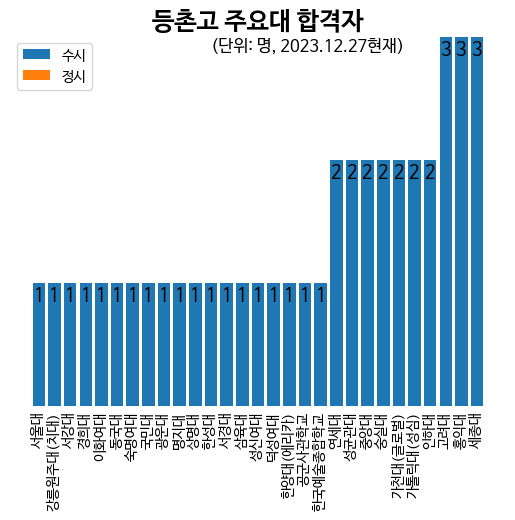

In [ ]:
#RPA로 합불자료에서 그래프 자동 완성

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz


uni = ['서울대', '강릉원주대(강릉)', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대',
       '건국대', '동국대', '홍익대', '숙명여대', '국민대', '숭실대', '세종대', '서울과기대',
       '광운대', '명지대', '상명대', '가천대(글로벌)', '가톨릭대(성심)',
       '한성대', '서경대', '삼육대', '성신여대', '덕성여대', '아주대', '인하대', '한양대(에리카)', '공군사관학교', '한국예술종합학교']


#csv파일 불러오기
##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{pathdeungchon_2024_habul.xlsx')



# 대한민국 표준시를 사용하여 현재 날짜와 시간을 가져옵니다.
seoul_tz = pytz.timezone('Asia/Seoul')
current_datetime = datetime.now(seoul_tz)

# 오늘의 날짜로 변경 (형식: 12.17.)
current_date = current_datetime.strftime('%Y.%m.%d')

print("\n***2024 등촌고 합격자수***")

#빈 리스트
uni_new = []
num_su = []
num_je = []

#리스트에 새로운 대학리스트와, 수시합격자, 정시합격자를 담기
for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['지원시기', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['지원시기'] == '수시'])
    num_je_u = len(df_u[df_u['지원시기'] == '정시'])

    if (num_su_u > 0) or (num_je_u > 0):
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        print(u, "합격자수 - 수시:", str(num_su_u) + "명,", "정시:", str(num_je_u) + "명")
        print("-----------------------------------------\n")


if len(uni_new) > 0:
    # sort the data by the total number of admissions (sum of num_su and num_je)
    data = sorted(zip(uni_new, num_su, num_je), key=lambda x: x[1]+x[2], reverse=False)
    uni_new = [x[0] for x in data]
    num_su = [x[1] for x in data]
    num_je = [x[2] for x in data]


    # plot the bar graph
    fig, ax = plt.subplots()
    ax.bar(uni_new, num_su, label='수시')
    ax.bar(uni_new, num_je, bottom=num_su, label='정시')

    # add value labels
    for i, (su, je) in enumerate(zip(num_su, num_je)):
        ax.text(i, su-0.1, su, ha='center', va='center', fontsize=13)
        #ax.text(i, je+0.02, je, ha='center', va='center', fontsize=13)
        #ax.text(i, su/2, su, ha='center', va='center')  예비코드: 수시와 정시합격자가 누적될때 적절한 수시합격자수 위치
        #ax.text(i, su + je/2, je, ha='center', va='center') 예비코드: 수시와 정시합격자가 누적될때 적절한 정시합격자수 위치

    #범례
    ax.legend()


    # 그래프 제목
    ax.set_title('등촌고 주요대 합격자', fontsize=18, fontweight='bold', loc='center')


    # 그래프 부제목
    ax.text(0.6, 1.00, f'(단위: 명, {current_date}현재)', ha='center', va='top', transform=ax.transAxes, fontsize=12)

    # X축 눈금(ticks) 제거
    ax.tick_params(axis='x', which='both', length=0)


    plt.xticks(rotation= 90) #x축 45도 회전
    plt.box(False) #테두리 박스 제거
    plt.yticks([]) #y축 제거
    plt.show()
else:
    print("아쉽게도 그래프를 그릴 합격자가 없습니다:().")


In [ ]:
name = input('이름:')
df_name = df[df['이름'] == name]

df_name[['이름', '대학', '모집단위', '전형분류', '전과목']]

이름:황신영


,이름,대학,모집단위,전형분류,전과목
668,황신영,서강대,경제학과,논술,3.035
669,황신영,성균관대,사회과학계열,논술,3.035
670,황신영,이화여대,경제학과,논술,3.035
671,황신영,중앙대,경제학부,논술,3.035
672,황신영,한양대,경제금융학부,논술,3.035


In [ ]:
df.columns

Index(['학번', '이름', '지역', '대학', '지원시기', '전형명', '계열', '모집단위', '1단계', '최종', '예비',
       '등록', '비고', '전형종류', '전형일자', '1단계발표일', '최종발표일', '최저학력기준', '모집인원', '전형분류',
       '전형방법', '전과목', '국수영사과', '국수영사', '국수영과', '국수영', '국어', '수학', '영어', '사회',
       '과학', '비교과', '국어영역', '표준점수', '백분위', '등급', '수학영역', '표준점수.1', '백분위.1',
       '등급.1', '등급.2', '탐구영역', '과목명', '표준점수.2', '백분위.2', '등급.3', '과목명.1',
       '표준점수.3', '백분위.3', '등급.4', '등급.5', '과목명.2', '등급.6'],
      dtype='object')

In [ ]:
# 계열별 합격자수  - 공통, 예체능을 인문으로 통합

from tabulate import tabulate

# 지역, 최종, ace대학 제외
df_4year = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))].copy()

# Combine '공통' and '예체능' into '인문' 계열
df_4year['계열'] = df_4year['계열'].replace(['공통', '예체능'], '인문')

# Group by '계열' and calculate the ratio
result = df_4year.groupby('계열').size().reset_index(name='합격자(건)')
result['비율(%)'] = (result['합격자(건)'] / result['합격자(건)'].sum() * 100).round(0).astype(int)  # Round to the nearest integer

# Rename the columns
result = result.rename(columns={'계열': '계열', '합격자(건)': '합격자(건)', '비율(%)': '비율(%)'})

print(tabulate(result, headers='keys', tablefmt='plain', showindex=False))

계열      합격자(건)    비율(%)
인문              25         40
자연              38         60
